
# Classifiying and Predicting the Outcome of H-1B Work Visa Applications - EDA

# Importing the necessary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the file
df = pd.read_excel("D:/Main Project/H-1B_Disclosure_Data_FY2019.xlsx")

In [3]:
data = df

In [4]:
data.shape

(664616, 260)

THE GIVEN DATA HAS 664616 ROWS AND 260 COLUMNS

## Visualizing the dataset

In [5]:
data.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,2016-04-08,2019-04-30,NaT,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,2017-07-14,2019-05-13,NaT,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,2017-08-23,2019-04-30,NaT,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,2017-12-22,2019-08-20,NaT,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,2018-01-10,2019-04-15,NaT,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Defining the features in the given dataset
features = data.columns 
for feature in features:
    print(feature)

CASE_NUMBER
CASE_STATUS
CASE_SUBMITTED
DECISION_DATE
ORIGINAL_CERT_DATE
VISA_CLASS
JOB_TITLE
SOC_CODE
SOC_TITLE
FULL_TIME_POSITION
PERIOD_OF_EMPLOYMENT_START_DATE
PERIOD_OF_EMPLOYMENT_END_DATE
TOTAL_WORKER_POSITIONS
NEW_EMPLOYMENT
CONTINUED_EMPLOYMENT
CHANGE_PREVIOUS_EMPLOYMENT
NEW_CONCURRENT_EMPLOYMENT
CHANGE_EMPLOYER
AMENDED_PETITION
EMPLOYER_NAME
EMPLOYER_BUSINESS_DBA
EMPLOYER_ADDRESS1
EMPLOYER_ADDRESS2
EMPLOYER_CITY
EMPLOYER_STATE
EMPLOYER_POSTAL_CODE
EMPLOYER_COUNTRY
EMPLOYER_PROVINCE
EMPLOYER_PHONE
EMPLOYER_PHONE_EXT
NAICS_CODE
AGENT_REPRESENTING_EMPLOYER
AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME
AGENT_ATTORNEY_ADDRESS1
AGENT_ATTORNEY_ADDRESS2
AGENT_ATTORNEY_CITY
AGENT_ATTORNEY_STATE
AGENT_ATTORNEY_POSTAL_CODE
AGENT_ATTORNEY_COUNTRY
AGENT_ATTORNEY_PROVINCE
AGENT_ATTORNEY_PHONE
AGENT_ATTORNEY_PHONE_EXT
STATE_OF_HIGHEST_COURT
NAME_OF_HIGHEST_STATE_COURT
WORKSITE_WORKERS_1
SECONDARY_ENTITY_1
SECONDARY_ENTITY_BUSINESS_NAME_1
WORKSITE_ADDRESS1_1
WORKSITE_ADDRESS2_1
WORKSITE_CITY_1
WORKSIT

## Feature Selection

The important features in the dataset which can affect the model building are : 
1. CASE_STATUS
2. VISA_CLASS
3. EMPLOYER_NAME
4. AGENT_REPRESENTING_EMPLOYER
5. AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME
6. JOB_TITLE
7. SOC_TITLE
8. SOC_CODE
9. NAICS_CODE
10. CONTINUED_EMPLOYMENT
11. CHANGE_PREVIOUS_EMPLOYMENT
12. NEW_CONCURRENT_EMPLOYMENT
13. CHANGE_EMPLOYER
14. AMENDED_PETITION
15. H-1B_DEPENDENT
16. WILLFUL_VIOLATOR
17. SUPPORT_H1B
18. TOTAL_WORKER_POSITIONS
19. EMPLOYER_COUNTRY

In [7]:
#Selecting the important features for model building
features_final = ["CASE_STATUS", "VISA_CLASS","EMPLOYER_NAME","EMPLOYER_COUNTRY","AGENT_REPRESENTING_EMPLOYER","JOB_TITLE","SOC_TITLE","SOC_CODE","NAICS_CODE","CONTINUED_EMPLOYMENT","CHANGE_PREVIOUS_EMPLOYMENT","NEW_CONCURRENT_EMPLOYMENT","CHANGE_EMPLOYER","AMENDED_PETITION","H-1B_DEPENDENT","WILLFUL_VIOLATOR","AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME", "SUPPORT_H1B", "TOTAL_WORKER_POSITIONS" ]
data_final = data[features_final]

In [8]:
#Checking for the duplicate values
duplicate = data_final[data_final.duplicated()]
duplicate.shape

(285041, 19)

In [9]:
#Removing the duplicate values
data_final = data_final.drop_duplicates()
data_final.shape

(379575, 19)

 After removing the duplicate values we are left with 379575 rows.

## EDA

In [10]:
#Checking for the datatypes
data_final.dtypes

CASE_STATUS                               object
VISA_CLASS                                object
EMPLOYER_NAME                             object
EMPLOYER_COUNTRY                          object
AGENT_REPRESENTING_EMPLOYER               object
JOB_TITLE                                 object
SOC_TITLE                                 object
SOC_CODE                                  object
NAICS_CODE                               float64
CONTINUED_EMPLOYMENT                      object
CHANGE_PREVIOUS_EMPLOYMENT                 int64
NEW_CONCURRENT_EMPLOYMENT                float64
CHANGE_EMPLOYER                            int64
AMENDED_PETITION                           int64
H-1B_DEPENDENT                            object
WILLFUL_VIOLATOR                          object
AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME     object
SUPPORT_H1B                               object
TOTAL_WORKER_POSITIONS                   float64
dtype: object

In [11]:
Categorical = ['CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','EMPLOYER_COUNTRY','AGENT_REPRESENTING_EMPLOYER','JOB_TITLE','SOC_TITLE','H-1B_DEPENDENT', 'SUPPORT_H1B','AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME','WILLFUL_VIOLATOR']
Numerical = ['TOTAL_WORKER_POSITIONS','AMENDED_PETITION','CHANGE_EMPLOYER','NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT','CONTINUED_EMPLOYMENT','SOC_CODE','NAICS_CODE']

In [12]:
data_final.describe()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,TOTAL_WORKER_POSITIONS
count,379573.000000,379575.000000,379574.000000,379575.000000,379575.000000,379573.000000
mean,449854.582681,0.117120,0.008736,0.241117,0.181548,1.445885
std,190327.992631,1.010834,0.278228,0.933172,0.778691,4.100401
min,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,424690.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,541511.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,541512.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,928120.000000,338.000000,99.000000,99.000000,99.000000,594.000000


In [13]:
#Checking for null values
data_final.isnull().sum()

CASE_STATUS                                   0
VISA_CLASS                                    0
EMPLOYER_NAME                                 9
EMPLOYER_COUNTRY                          21054
AGENT_REPRESENTING_EMPLOYER               21060
JOB_TITLE                                     1
SOC_TITLE                                     3
SOC_CODE                                      3
NAICS_CODE                                    2
CONTINUED_EMPLOYMENT                          0
CHANGE_PREVIOUS_EMPLOYMENT                    0
NEW_CONCURRENT_EMPLOYMENT                     1
CHANGE_EMPLOYER                               0
AMENDED_PETITION                              0
H-1B_DEPENDENT                            13338
WILLFUL_VIOLATOR                          13343
AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME     83091
SUPPORT_H1B                              293462
TOTAL_WORKER_POSITIONS                        2
dtype: int64

In [14]:
#Checking the visa class categories
visa_class_categories = data_final.VISA_CLASS.value_counts().index
print(visa_class_categories)
visa_class_values = data_final.VISA_CLASS.value_counts().values
print(visa_class_values)

Index(['H-1B', 'E-3 Australian', 'H-1B1 Singapore', 'H-1B1 Chile'], dtype='object')
[365792  11602   1184    997]



### Observations

We find that there are 4 main categories of the visa class
1. H-1B 
2. E-3 Australian
3. H-1B1 Singapore
4. H-1B1 Chile




c:\Users\Mayurdhvajsinh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


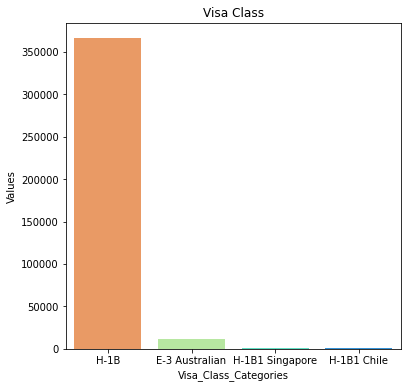

In [15]:
#Plotting a bar graph for the above observations
plt.figure(figsize = (6, 6))
bargraph = sns.barplot(visa_class_categories,visa_class_values, data = data_final, palette = 'rainbow_r')

plt.xlabel('Visa_Class_Categories')
plt.ylabel('Values')
plt.title("Visa Class")
plt.show()

### Selecting the data with only H-1B visa class

In [16]:
#Finding the % of applications other than the H-1B visas
((data_final['VISA_CLASS'] == 'E-3 Australian') | (data_final['VISA_CLASS'] == 'H-1B1 Singapore') | (data_final['VISA_CLASS'] == 'H-1B1 Chile')).sum()/((data_final['VISA_CLASS'] == 'H-1B').sum())*100


3.7679883649724433



Since only 3.7% entries are of other visa classes  than H-1B we can remove these entries from the dataset

In [17]:
#Selecting only the values which have H1B as the visa class
data_H1B = data_final[data_final['VISA_CLASS'] == 'H-1B']

In [18]:
data_H1B.shape

(365792, 19)

## Univariate Analysis of Categorical Variables

#### Case Status

In [19]:
#Checking for null values
data_H1B.CASE_STATUS.isnull().sum()

0

 
There are no null values present 
 

In [20]:
#Checking for the categories of the case status 
case_status_categories = data_H1B.CASE_STATUS.value_counts().index
case_status_values = data_H1B.CASE_STATUS.value_counts().values

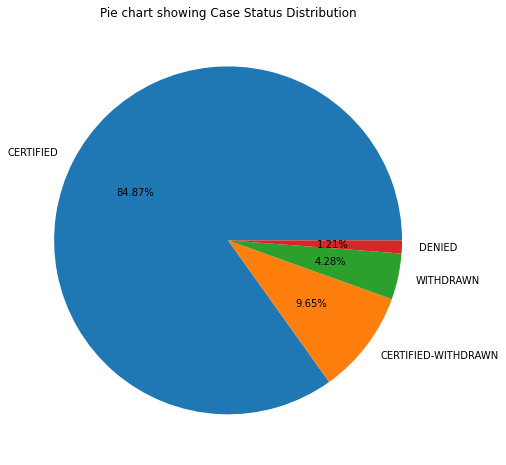

In [21]:
#Checking for the categories of the case status 
plt.figure(figsize = (8, 8))
plt.pie(case_status_values, labels=case_status_categories,autopct='%1.2f%%')
plt.title('Pie chart showing Case Status Distribution')
plt.show()



There are 4 major categories under the case status with the given number percentage of cases :
1. CERTIFIED                      84.79%
2. CERTIFIED-WITHDRAWN            9.70%
3. WITHDRAWN                      4.29%
4. DENIED                         1.21%



#### Agent Representing the Employer


In [22]:
Agent_categories = data_H1B.AGENT_REPRESENTING_EMPLOYER.value_counts(dropna = False).index
Agent_values = data_H1B.AGENT_REPRESENTING_EMPLOYER.value_counts(dropna = False).values

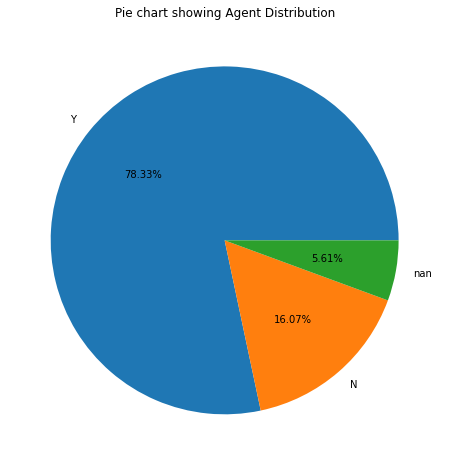

In [23]:
plt.figure(figsize = (8, 8))
plt.pie(Agent_values, labels=Agent_categories,autopct='%1.2f%%')
plt.title('Pie chart showing Agent Distribution')
plt.show()

In [24]:
data_H1B.AGENT_REPRESENTING_EMPLOYER.isnull().sum()

20516

Here we can see that 5.61% of the entries contains null values.

We can replace these null values by filling the values with No assuming that the people who have left the agent name as blank does not have any agent

In [25]:
data_H1B["AGENT_REPRESENTING_EMPLOYER"].fillna("N",inplace=True)

C:\Users\Mayurdhvajsinh\AppData\Local\Temp\ipykernel_18876\3608433016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_H1B["AGENT_REPRESENTING_EMPLOYER"].fillna("N",inplace=True)


In [26]:
data_H1B.AGENT_REPRESENTING_EMPLOYER.value_counts(dropna = False)

Y    286511
N     79281
Name: AGENT_REPRESENTING_EMPLOYER, dtype: int64

Here we can see that all the values have been replaced.

#### Job Title

In [27]:
data_H1B.JOB_TITLE.value_counts()[:20]

SOFTWARE ENGINEER            11754
SOFTWARE DEVELOPER           11404
SENIOR SOFTWARE ENGINEER      4243
ASSISTANT PROFESSOR           4087
BUSINESS ANALYST              2344
JAVA DEVELOPER                2041
PROGRAMMER ANALYST            1883
DATA SCIENTIST                1820
PROJECT MANAGER               1595
ACCOUNTANT                    1487
ASSOCIATE                     1432
SYSTEMS ENGINEER              1382
DATABASE ADMINISTRATOR        1379
DATA ANALYST                  1321
DEVOPS ENGINEER               1236
APPLICATION DEVELOPER         1224
MECHANICAL ENGINEER           1222
RESEARCH ASSOCIATE            1203
SENIOR SOFTWARE DEVELOPER     1123
PROJECT ENGINEER              1112
Name: JOB_TITLE, dtype: int64

In [28]:
#This feature has one missing value
data_H1B.JOB_TITLE.isnull().sum()

1

In [29]:
#Dropping the row having the missing value
data_H1B = data_H1B.dropna(subset = ['JOB_TITLE'])

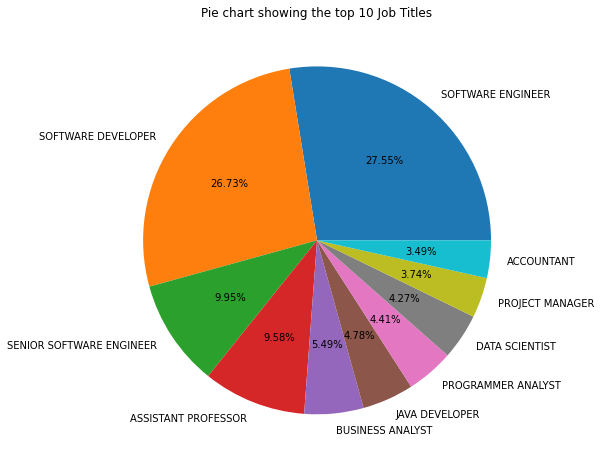

In [30]:
#Plotting the top 10 JOB TITLES
JobTitle = data_H1B.JOB_TITLE.value_counts().index[:10]
JobTitle_values = data_H1B.JOB_TITLE.value_counts().values[:10]
plt.figure(figsize = (8, 8))
plt.pie(JobTitle_values, labels = JobTitle, autopct='%1.2f%%')
plt.title('Pie chart showing the top 10 Job Titles')
plt.show()

From the above pie chart we can see that the majority people who applied for the H1B visas belong to the following categoies:
1. Software Engineer
2. Software Developer
3. Senior Software Engineer
4. Assistant Professor
5. Bussiness Analyst
6. Java Developer
7. Programmer Analyst
8. Data Scientist
9. Project Manager
10. Accountant

#### AGENT ATTORNEY LAW FIRM BUSINESS NAME

In [31]:
#Checking for missing values
data_H1B.AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME.isnull().sum()

79408

###### Since the number of missing values is very high we cannot remove it as it can cause serious loss of data. Therefore, replacing the missing values with the mode of the data

In [32]:
#Replacing it with the mode of the data
data_H1B.AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME.fillna(data_H1B.AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME.mode()[0], inplace = True)

##### Finding the companies which have the highest applications

In [33]:
all_applications = data_H1B.AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME.value_counts()[:25]
all_applications

FRAGOMEN, DEL REY, BERNSEN & LOEWY, LLP                106444
BERRY APPLEMAN & LEIDEN LLP                             16284
OGLETREE, DEAKINS, NASH, SMOAK & STEWART, P.C.           5386
LAW OFFICE OF THOMAS V. ALLEN                            4070
ERICKSON IMMIGRATION GROUP                               3603
SEYFARTH SHAW LLP                                        3484
FRAGOMEN, DEL REY, BERNSEN & LOEWY LLP                   2973
FAKHOURY GLOBAL IMMIGRATION, USA PC                      2593
GLOBAL IMMIGRATION ASSOCIATES, PC                        2460
FRAGOMEN, DEL REY, BERNSEN & LOEWY                       2455
INTERNATIONAL LEGAL AND BUSINESS SERVICES GROUP LLP      2440
GLOBAL IMMIGRATION PARTNERS, INC                         2336
PEARL LAW GROUP                                          2154
CHUGH, LLP                                               1953
GIBNEY, ANTHONY & FLAHERTY, LLP                          1808
RAMINENI & SHEPARD, LLC                                  1792
GLOBAL I

##### Finding the companies which have the highest rate of rejection

In [34]:
rejection = data_H1B[(data_H1B['CASE_STATUS'] == "DENIED")]
rejection.AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME.value_counts()[:25]

FRAGOMEN, DEL REY, BERNSEN & LOEWY, LLP           1404
BERRY APPLEMAN & LEIDEN LLP                        188
OGLETREE, DEAKINS, NASH, SMOAK & STEWART, P.C.      59
ERICKSON IMMIGRATION GROUP                          55
EY LAW LLP                                          46
PEARL LAW GROUP                                     31
SEYFARTH SHAW LLP                                   30
FRAGOMEN, DEL REY, BERNSEN & LOEWY                  26
GLOBAL IMMIGRATION PARTNERS, INC                    23
LAW OFFICE OF THOMAS V. ALLEN                       23
FRAGOMEN, DEL REY, BERNSEN & LOEWY LLP              19
LAW OFFICE OF KENNETH W. JIANG                      17
LAW OFFICES OF D.ROBERT JONES PLLC                  15
FRAGOMEN DEL REY BERNSEN & LOEWY LLP                14
MORGAN, LEWIS & BOCKIUS LLP                         14
GARFINKEL IMMIGRATION LAW FIRM                      13
BBI LAW GROUP, P.C.                                 13
RANA LAW FIRM                                       12
MURTHY LAW

##### Observations

The top 5 companies with the maximum rejection rates are

1. FRAGOMEN, DEL REY, BERNSEN & LOEWY, LLP                  
2. BERRY APPLEMAN & LEIDEN LLP           
3. OGLETREE, DEAKINS, NASH, SMOAK & STEWART, P.C. 
4. ERICKSON IMMIGRATION GROUP                         
5. EY LAW LLP

#### EMPLOYER_NAME

In [35]:
#Checking for the missing values
data_H1B.EMPLOYER_NAME.isnull().sum()
#There are 9 missing values under this column

9

In [36]:
#Dropping the rows with missing values.
data_H1B = data_H1B.dropna(subset = ['EMPLOYER_NAME'])

In [37]:
data_H1B.EMPLOYER_NAME.isnull().sum()

0

In [38]:
all_employers = data_H1B.EMPLOYER_NAME.value_counts()[:25]
all_employers

GOOGLE LLC                           9206
IBM CORPORATION                      2082
AMAZON.COM SERVICES, INC.            1834
DELOITTE CONSULTING LLP              1277
IBM INDIA PRIVATE LIMITED            1113
JPMORGAN CHASE & CO.                 1075
FACEBOOK, INC.                       1008
WAL-MART ASSOCIATES, INC.             839
TATA CONSULTANCY SERVICES LIMITED     827
APPLE INC.                            823
SALESFORCE.COM, INC.                  808
WIPRO LIMITED                         790
ACCENTURE LLP                         776
L&T TECHNOLOGY SERVICES LIMITED       746
MICROSOFT CORPORATION                 734
NTT DATA, INC.                        684
LARSEN & TOUBRO INFOTECH LIMITED      670
CUMMINS INC.                          661
AMAZON WEB SERVICES, INC.             605
TESLA, INC.                           580
CISCO SYSTEMS, INC.                   558
BANK OF AMERICA N.A.                  557
INTEL CORPORATION                     548
PAYPAL, INC.                      

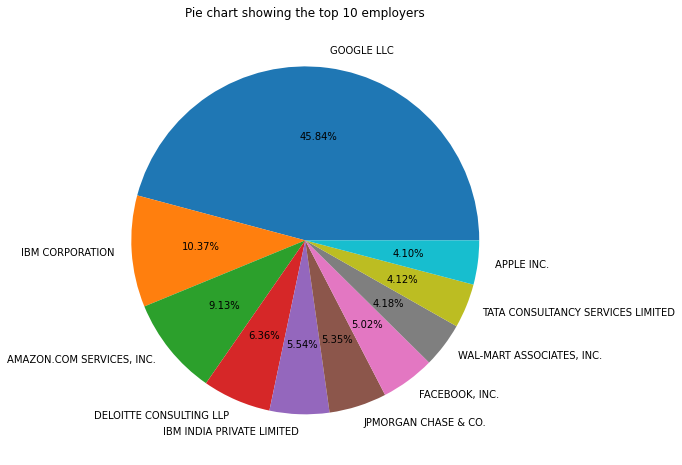

In [39]:
employers = data_H1B.EMPLOYER_NAME.value_counts().index[:10]
employers_values = data_H1B.EMPLOYER_NAME.value_counts().values[:10]
plt.figure(figsize = (8, 8))
plt.pie(employers_values, labels = employers, autopct='%1.2f%%')
plt.title('Pie chart showing the top 10 employers')
plt.show()

From the above pie chart we can see that top 10 employers are: 
1. Google LLC
2. IBM Corporation
3. Amazon.com Services, INC.
4. Delloite Consulting LLP
5. IBM India Provate Limited
6. JP MORGAN CHASE & Co.
7. Facebook, INC
8. Walmart Associates
9. TATA Consultancy Services Limited
10. Apple INC.

#### EMPLOYER COUNTRY

In [40]:
#Checking for missing values
data_H1B.EMPLOYER_COUNTRY.isnull().sum()

20508

In [41]:
#Replacing it with the mode of the data i.e USA
data_H1B.EMPLOYER_COUNTRY.fillna(data_H1B.EMPLOYER_COUNTRY.mode()[0], inplace = True)

In [42]:
data_H1B.EMPLOYER_COUNTRY.isnull().sum()

0

In [43]:
data_H1B.EMPLOYER_COUNTRY.value_counts()

UNITED STATES OF AMERICA    365753
CANADA                          19
INDIA                            3
GUATEMALA                        2
ALBANIA                          2
TURKEY                           1
AFGHANISTAN                      1
AUSTRALIA                        1
Name: EMPLOYER_COUNTRY, dtype: int64

In majority of the applications we find that the Employer is from USA
Minimum number of applications are from Turkey, Australia and Afghanistan

#### SOC TITLE

In [44]:
#Checking for the missing values
data_H1B.SOC_TITLE.isnull().sum()

3

In [45]:
#Dropping the rows with missing values
data_H1B = data_H1B.dropna(subset = ['SOC_TITLE'])

In [46]:
data_H1B.SOC_TITLE.value_counts()

SOFTWARE DEVELOPERS, APPLICATIONS                     112157
COMPUTER OCCUPATIONS, ALL OTHER                        30649
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                  20897
COMPUTER SYSTEMS ANALYSTS                              14052
MECHANICAL ENGINEERS                                    8937
                                                       ...  
MECHANICAL ENGINEEERS                                      1
MECHANCIAL ENGINEER                                        1
INDUSTRIAL ENGINEER                                        1
HEALTH AND SAFETY ENGS., EXCEPT MINING SAFETY ENGS         1
15-2031                                                    1
Name: SOC_TITLE, Length: 859, dtype: int64

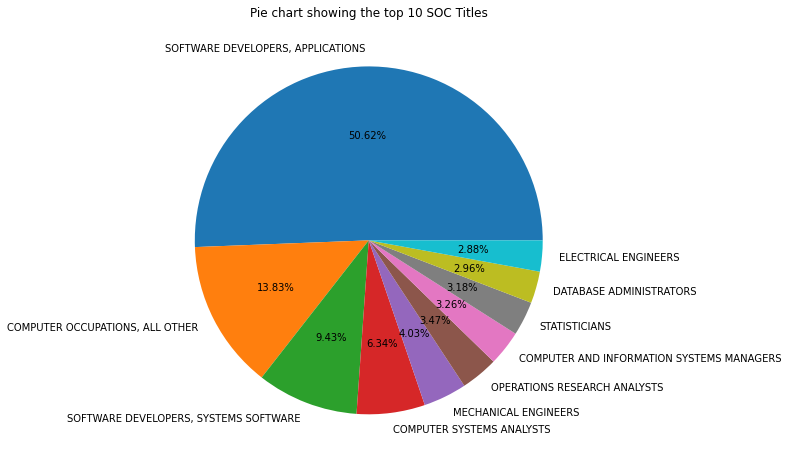

In [47]:
plt.figure(figsize = (8, 8))
plt.pie(data_H1B.SOC_TITLE.value_counts().values[:10], labels = data_H1B.SOC_TITLE.value_counts().index[:10], autopct='%1.2f%%')
plt.title('Pie chart showing the top 10 SOC Titles')
plt.show()

The applications had the following occupational categories: 
1. Software Developers and Applications
2. Computer Operations and Others
3. Software Developers, System Software
4. Computer Systems Analyst
5. Mechanical Engineers
6. Operations Research Analyst
7. Computer and information systems managers
8. Statisticians
9. Database Administrators
10. Electrical Engineers

#### H1B DEPENDENT

In [48]:
data_H1B['H-1B_DEPENDENT'].value_counts(dropna = False)

N      280140
Y       85624
NaN        15
Name: H-1B_DEPENDENT, dtype: int64

In [49]:
data_H1B = data_H1B.dropna(subset = ['H-1B_DEPENDENT'])

In [50]:
Categorical

['CASE_STATUS',
 'VISA_CLASS',
 'EMPLOYER_NAME',
 'EMPLOYER_COUNTRY',
 'AGENT_REPRESENTING_EMPLOYER',
 'JOB_TITLE',
 'SOC_TITLE',
 'H-1B_DEPENDENT',
 'SUPPORT_H1B',
 'AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME',
 'WILLFUL_VIOLATOR']

#### SUPPORT_H1B

In [51]:
data_H1B['SUPPORT_H1B'].value_counts(dropna = False)

NaN    279695
Y       84654
N        1415
Name: SUPPORT_H1B, dtype: int64

In [52]:
#Replacing it with the mode of the data
data_H1B.SUPPORT_H1B.fillna(data_H1B.SUPPORT_H1B.mode()[0], inplace = True)

In [53]:
data_H1B['SUPPORT_H1B'].value_counts(dropna = False)

Y    364349
N      1415
Name: SUPPORT_H1B, dtype: int64

#### WILLFUL_VIOLATOR

In [54]:
data_H1B['WILLFUL_VIOLATOR'].value_counts(dropna = False)

N    365499
Y       265
Name: WILLFUL_VIOLATOR, dtype: int64

#### LABEL ENCODING THE CATEGORICAL VALUES

In [55]:
Categorical

['CASE_STATUS',
 'VISA_CLASS',
 'EMPLOYER_NAME',
 'EMPLOYER_COUNTRY',
 'AGENT_REPRESENTING_EMPLOYER',
 'JOB_TITLE',
 'SOC_TITLE',
 'H-1B_DEPENDENT',
 'SUPPORT_H1B',
 'AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME',
 'WILLFUL_VIOLATOR']

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #creating an object of LabelEncoder class
WillfulVoilator = le.fit_transform(data_H1B['WILLFUL_VIOLATOR'])
SupportH1B = le.fit_transform(data_H1B['SUPPORT_H1B'])
H1B_Dependent = le.fit_transform(data_H1B['H-1B_DEPENDENT'])
SOCTitle = le.fit_transform(data_H1B['SOC_TITLE'])
CountryEmployer = le.fit_transform(data_H1B['EMPLOYER_COUNTRY'])
EmployerName = le.fit_transform(data_H1B['EMPLOYER_NAME'].astype(str))
CaseStatus = le.fit_transform(data_H1B['CASE_STATUS'])
VisaClass = le.fit_transform(data_H1B['VISA_CLASS'])
LawFirm = le.fit_transform(data_H1B['AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME'].astype(str))
AgentRepresentingEmployer = le.fit_transform(data_H1B['AGENT_REPRESENTING_EMPLOYER'])
JobTitle = le.fit_transform(data_H1B['JOB_TITLE'].astype(str))
SOCCode = le.fit_transform(data_H1B['SOC_CODE'])

In [57]:
data_H1B['WILLFUL_VIOLATOR'] = WillfulVoilator
data_H1B['SUPPORT_H1B'] = SupportH1B
data_H1B['H-1B_DEPENDENT'] = H1B_Dependent
data_H1B['SOC_TITLE'] = SOCTitle
data_H1B['EMPLOYER_COUNTRY'] = CountryEmployer
data_H1B['EMPLOYER_NAME'] = EmployerName
data_H1B['CASE_STATUS'] = CaseStatus
data_H1B['VISA_CLASS'] = VisaClass 
data_H1B['AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME'] = LawFirm 
data_H1B['AGENT_REPRESENTING_EMPLOYER'] = AgentRepresentingEmployer
data_H1B['SOC_CODE'] = SOCCode
data_H1B['JOB_TITLE'] = JobTitle

In [58]:
#There are no missing values under the SOC CODE
data_H1B.SOC_CODE.isnull().sum()

0

In [59]:
data_H1B.SOC_CODE.value_counts()

95     112373
108     31273
97      20922
92      14378
157      8952
        ...  
327         1
55          1
334         1
50          1
526         1
Name: SOC_CODE, Length: 527, dtype: int64

In [60]:
data_H1B

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,SUPPORT_H1B,TOTAL_WORKER_POSITIONS
0,3,0,47135,7,0,7659,14,2,541810.0,1,0,0.0,0,0,0,0,1520,1,1.0
5,3,0,36533,7,0,33179,14,2,541810.0,1,0,0.0,0,0,0,0,1520,1,1.0
6,3,0,37474,7,1,24151,14,2,454111.0,0,1,0.0,0,0,0,0,1517,1,1.0
7,3,0,32327,7,1,34565,14,2,541990.0,1,0,0.0,0,0,0,0,1103,1,1.0
8,3,0,55256,7,1,405,14,2,541820.0,1,0,0.0,0,0,0,0,5965,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664605,0,0,29837,7,1,37346,836,524,541380.0,0,0,0.0,0,1,0,0,1491,1,1.0
664608,0,0,29837,7,1,37350,836,524,541380.0,1,0,0.0,0,0,0,0,1491,1,1.0
664609,2,0,45221,7,0,18426,230,525,488320.0,0,0,0.0,0,0,0,0,1520,1,6.0
664610,0,0,45221,7,0,18426,230,525,488320.0,0,0,0.0,0,0,0,0,1520,1,6.0


## Univariate Analysis on the Numerical Variables

In [61]:
data_H1B.CONTINUED_EMPLOYMENT.value_counts()
data_H1B.drop(data_H1B[data_H1B['CONTINUED_EMPLOYMENT'] == 'B'].index, inplace = True)

In [62]:
data_H1B.CONTINUED_EMPLOYMENT.value_counts()

0      259306
1       72002
0       19964
1        9738
2        1186
5        1105
4         830
10        283
3         270
2         207
5         148
01        132
10        120
3         113
4          66
25         46
6          37
8          34
15         33
20         29
15         15
12         13
30         12
6          11
50          9
8           8
12          6
40          5
001         5
18          3
13          3
7           3
02          2
25          2
40          2
35          2
30          1
18          1
21          1
50          1
99          1
20          1
17          1
00          1
99          1
45          1
11          1
Name: CONTINUED_EMPLOYMENT, dtype: int64

In [63]:
data_H1B.AMENDED_PETITION.value_counts()

0     317054
1      43694
5       1534
2       1320
4        893
3        547
10       355
15       284
11        26
6         22
20        15
8          6
30         3
7          3
99         2
14         1
25         1
35         1
Name: AMENDED_PETITION, dtype: int64

#### NAICS_CODE

In [64]:
data_H1B.NAICS_CODE.isnull().sum()

1

In [65]:
data_H1B = data_H1B.dropna(subset = ['NAICS_CODE'])

In [66]:
data_H1B.NAICS_CODE.isnull().sum()

0

In [67]:
data_H1B.NAICS_CODE.value_counts(dropna = False)

541511.0    93428
541512.0    25980
611310.0    21380
541519.0    10099
541330.0     9899
            ...  
8114.0          1
44531.0         1
42443.0         1
44512.0         1
54187.0         1
Name: NAICS_CODE, Length: 1959, dtype: int64

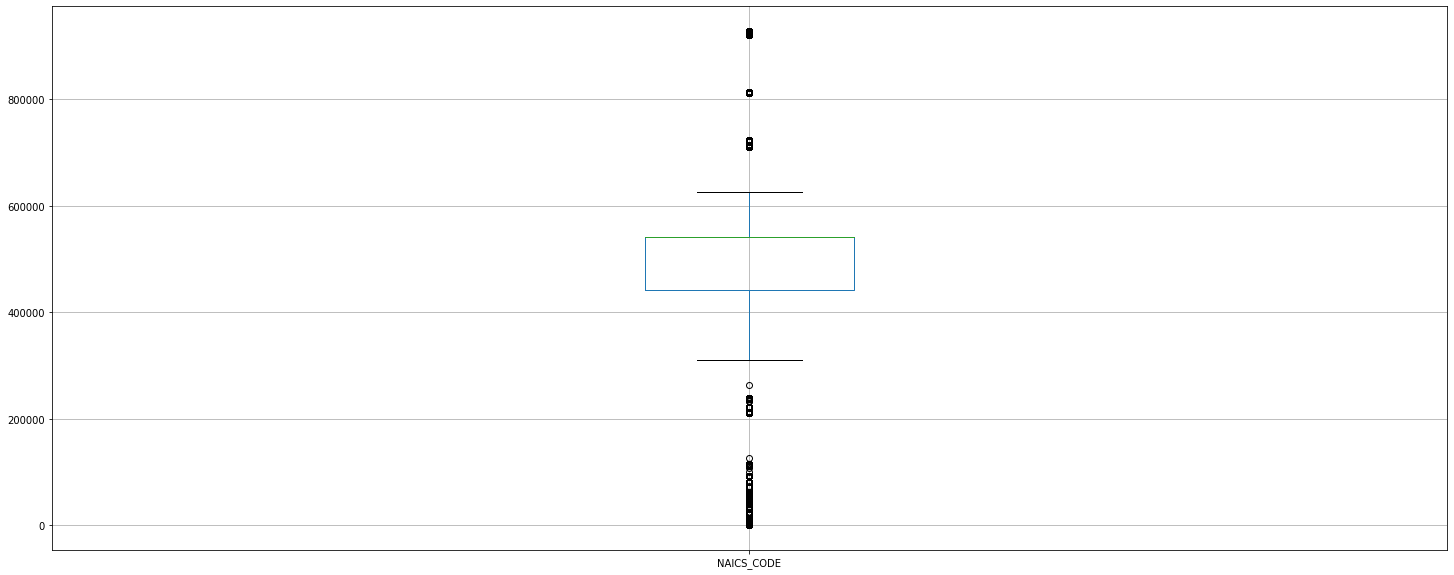

In [68]:
countplt, ax = plt.subplots(figsize = (25,10))
ax = data_H1B.boxplot(column = 'NAICS_CODE')

#### TOTAL_WORKER_POSITIONS

In [69]:
data_H1B.TOTAL_WORKER_POSITIONS.isnull().sum()

2

In [70]:
data_H1B = data_H1B.dropna(subset = ['TOTAL_WORKER_POSITIONS'])

In [71]:
data_H1B.TOTAL_WORKER_POSITIONS.isnull().sum()

0

In [72]:
data_H1B.TOTAL_WORKER_POSITIONS.value_counts()

1.0      350839
2.0        2925
10.0       2205
3.0        2147
5.0        1755
20.0       1052
15.0        946
25.0        884
50.0        653
4.0         497
30.0        482
6.0         397
12.0        157
8.0         136
24.0        127
7.0         124
100.0        74
40.0         48
9.0          36
75.0         34
45.0         26
11.0         22
16.0         20
14.0         18
60.0         17
35.0         15
17.0         15
18.0         12
13.0         12
32.0          9
150.0         8
19.0          7
23.0          6
34.0          6
36.0          6
22.0          5
28.0          4
200.0         4
175.0         3
99.0          2
594.0         2
300.0         2
80.0          2
500.0         2
70.0          2
90.0          2
37.0          1
78.0          1
76.0          1
65.0          1
31.0          1
47.0          1
26.0          1
43.0          1
54.0          1
110.0         1
21.0          1
Name: TOTAL_WORKER_POSITIONS, dtype: int64

### Outlier Detection

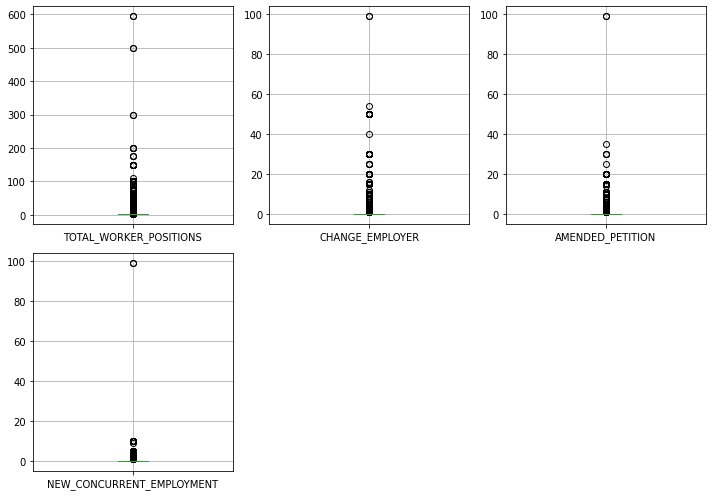

In [73]:
fig, ax = plt.subplots(2,3, figsize = (10,7))
numerical_data = data_H1B[["TOTAL_WORKER_POSITIONS", "CHANGE_EMPLOYER", "AMENDED_PETITION", "NEW_CONCURRENT_EMPLOYMENT", "CHANGE_PREVIOUS_EMPLOYMENT"]]
for i,el in enumerate(list(numerical_data.columns.values)[:-1]):
    a = numerical_data.boxplot(el, ax=ax.flatten()[i])


fig.delaxes(ax[1,2]) 
fig.delaxes(ax[1,1])# remove empty subplot
plt.tight_layout() 

plt.show()

Outliers Removal

In [74]:
# def remove_outlier(col):
#     sorted(col)
#     Q1,Q3 = col.quantile([0.25,0.75])
#     IQR = Q3 - Q1
#     lr = Q1 - (1.5 * IQR)
#     ur = Q3 + (1.5 * IQR)
#     return lr, ur

# lessVis, moreVis = remove_outlier(data_H1B['TOTAL_WORKER_POSITIONS'])
# data_H1B['TOTAL_WORKER_POSITIONS'] = np.where(data_H1B['TOTAL_WORKER_POSITIONS']>moreVis,moreVis,data_H1B['TOTAL_WORKER_POSITIONS'])
# data_H1B['TOTAL_WORKER_POSITIONS'] = np.where(data_H1B['TOTAL_WORKER_POSITIONS']<lessVis,lessVis,data_H1B['TOTAL_WORKER_POSITIONS'])


In [75]:
# def remove_outlier(col):
#     sorted(col)
#     Q1,Q3 = col.quantile([0.25,0.75])
#     IQR = Q3 - Q1
#     lr = Q1 - (1.5 * IQR)
#     ur = Q3 + (1.5 * IQR)
#     return lr, ur

# lessVis, moreVis = remove_outlier(data_H1B['CHANGE_PREVIOUS_EMPLOYMENT'])
# data_H1B['CHANGE_PREVIOUS_EMPLOYMENT'] = np.where(data_H1B['CHANGE_PREVIOUS_EMPLOYMENT']>moreVis,moreVis,data_H1B['CHANGE_PREVIOUS_EMPLOYMENT'])
# data_H1B['CHANGE_PREVIOUS_EMPLOYMENT'] = np.where(data_H1B['CHANGE_PREVIOUS_EMPLOYMENT']<lessVis,lessVis,data_H1B['CHANGE_PREVIOUS_EMPLOYMENT'])


In [76]:
# countplt, ax = plt.subplots(figsize = (5,5))
# ax = numerical_data.boxplot(column = 'NAICS_CODE')

In [77]:
'''
There are a plenty of outliers in each field




Q1 = np.percentile(Numerical_Data['TOTAL_WORKER_POSITIONS'], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(data_H1B['AMENDED_PETITION'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data_H1B.shape)

upper = np.where(data_H1B['AMENDED_PETITION'] >= (Q3+1.5*IQR))
lower = np.where(data_H1B['AMENDED_PETITION'] <= (Q1-1.5*IQR))

print(upper)

data_H1B.drop(upper[0], inplace = True)
data_H1B.drop(lower[0], inplace = True)
 
print("New Shape: ", data_H1B.shape)

'''

'\nThere are a plenty of outliers in each field\n\n\n\n\nQ1 = np.percentile(Numerical_Data[\'TOTAL_WORKER_POSITIONS\'], 25, interpolation = \'midpoint\')\n \nQ3 = np.percentile(data_H1B[\'AMENDED_PETITION\'], 75, interpolation = \'midpoint\')\nIQR = Q3 - Q1\n\nprint("Old Shape: ", data_H1B.shape)\n\nupper = np.where(data_H1B[\'AMENDED_PETITION\'] >= (Q3+1.5*IQR))\nlower = np.where(data_H1B[\'AMENDED_PETITION\'] <= (Q1-1.5*IQR))\n\nprint(upper)\n\ndata_H1B.drop(upper[0], inplace = True)\ndata_H1B.drop(lower[0], inplace = True)\n \nprint("New Shape: ", data_H1B.shape)\n\n'

In [78]:
data_H1B.isnull().sum()

CASE_STATUS                              0
VISA_CLASS                               0
EMPLOYER_NAME                            0
EMPLOYER_COUNTRY                         0
AGENT_REPRESENTING_EMPLOYER              0
JOB_TITLE                                0
SOC_TITLE                                0
SOC_CODE                                 0
NAICS_CODE                               0
CONTINUED_EMPLOYMENT                     0
CHANGE_PREVIOUS_EMPLOYMENT               0
NEW_CONCURRENT_EMPLOYMENT                1
CHANGE_EMPLOYER                          0
AMENDED_PETITION                         0
H-1B_DEPENDENT                           0
WILLFUL_VIOLATOR                         0
AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME    0
SUPPORT_H1B                              0
TOTAL_WORKER_POSITIONS                   0
dtype: int64

In [79]:
data_H1B
data_H1B.describe()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,SUPPORT_H1B,TOTAL_WORKER_POSITIONS
count,365758.000000,365758.0,365758.000000,365758.000000,365758.000000,365758.000000,365758.000000,365758.000000,365758.000000,365758.000000,365757.000000,365758.000000,365758.000000,365758.000000,365758.000000,365758.000000,365758.000000,365758.000000
mean,0.248774,0.0,33129.383218,6.999691,0.783313,55326.304860,495.949262,123.807036,451437.288803,0.119306,0.008916,0.247306,0.186396,0.234092,0.000725,2515.392475,0.996131,1.459388
std,0.683679,0.0,19190.485990,0.036263,0.411988,31534.508002,256.729881,80.141903,188762.678341,1.028604,0.283053,0.947595,0.789611,0.423431,0.026907,1687.424708,0.062078,4.172246
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.0,16755.000000,7.000000,1.000000,26955.000000,207.000000,95.000000,442299.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1520.000000,1.000000,1.000000
50%,0.000000,0.0,31864.500000,7.000000,1.000000,57991.500000,526.000000,95.000000,541511.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1520.000000,1.000000,1.000000
75%,0.000000,0.0,50299.000000,7.000000,1.000000,82684.000000,752.000000,134.000000,541512.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3980.000000,1.000000,1.000000
max,3.000000,0.0,65727.000000,7.000000,1.000000,109610.000000,858.000000,526.000000,928120.000000,338.000000,99.000000,99.000000,99.000000,1.000000,1.000000,6465.000000,1.000000,594.000000


In [80]:
data_H1B.isnull().sum()

CASE_STATUS                              0
VISA_CLASS                               0
EMPLOYER_NAME                            0
EMPLOYER_COUNTRY                         0
AGENT_REPRESENTING_EMPLOYER              0
JOB_TITLE                                0
SOC_TITLE                                0
SOC_CODE                                 0
NAICS_CODE                               0
CONTINUED_EMPLOYMENT                     0
CHANGE_PREVIOUS_EMPLOYMENT               0
NEW_CONCURRENT_EMPLOYMENT                1
CHANGE_EMPLOYER                          0
AMENDED_PETITION                         0
H-1B_DEPENDENT                           0
WILLFUL_VIOLATOR                         0
AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME    0
SUPPORT_H1B                              0
TOTAL_WORKER_POSITIONS                   0
dtype: int64

In [81]:
data_H1B = data_H1B.dropna(subset = ['NEW_CONCURRENT_EMPLOYMENT'])

In [82]:
data_H1B.shape

(365757, 19)

### PLOTTING THE HEAT MAP FOR THE NUMERICAL VARIABLES

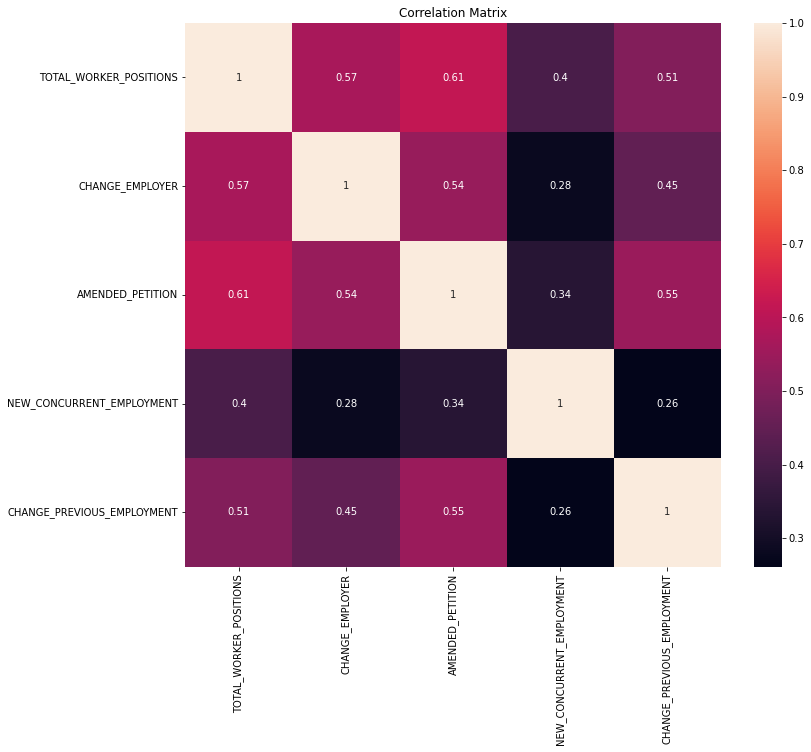

In [83]:
corelation = numerical_data.corr()
plt.figure(figsize = (12, 10))
Corr_mat = sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

plt.title("Correlation Matrix")
plt.show()

### Bivariate Analysis


In [84]:
data_H1B.EMPLOYER_COUNTRY.value_counts()

7    365728
3        19
5         3
4         2
1         2
6         1
0         1
2         1
Name: EMPLOYER_COUNTRY, dtype: int64

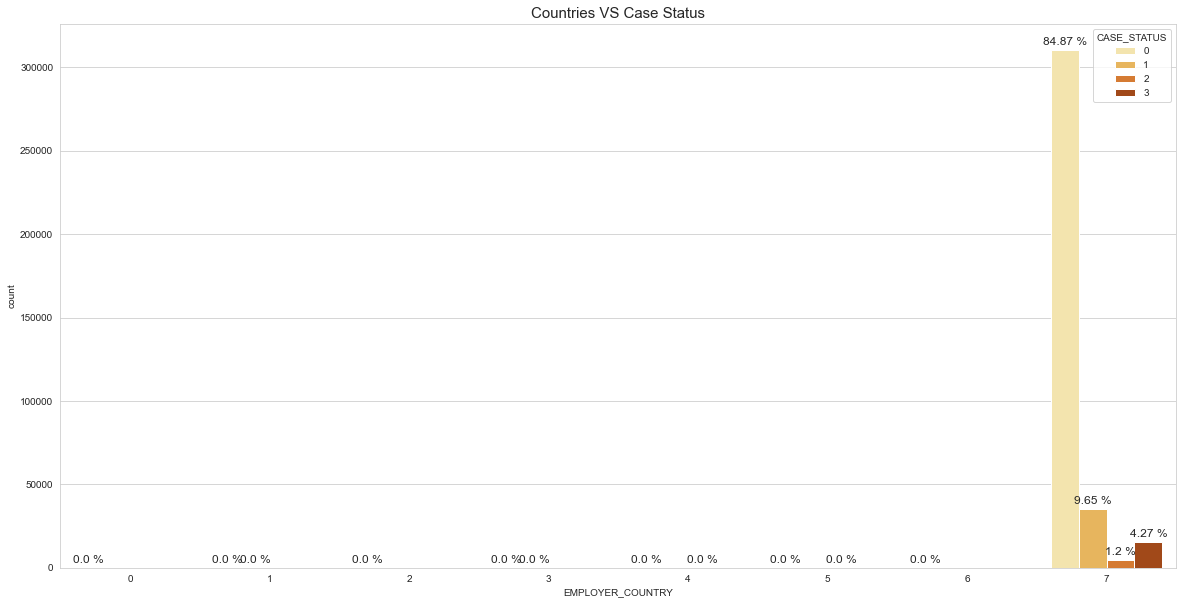

In [85]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize = (20,10))
ax=sns.countplot(x = data_H1B.EMPLOYER_COUNTRY,hue = data_H1B['CASE_STATUS'],palette = 'YlOrBr')
ax.set_title("Countries VS Case Status",fontsize = 15)

for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(data_H1B)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

### Since Random Forest Classifier is not sensitive to outliers and is not affected by normalisation, I will be utilizing the dataset as it is.

### Splitting the dataset

In [86]:
data_H1B

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,SUPPORT_H1B,TOTAL_WORKER_POSITIONS
0,3,0,47135,7,0,7659,14,2,541810.0,1,0,0.0,0,0,0,0,1520,1,1.0
5,3,0,36533,7,0,33179,14,2,541810.0,1,0,0.0,0,0,0,0,1520,1,1.0
6,3,0,37474,7,1,24151,14,2,454111.0,0,1,0.0,0,0,0,0,1517,1,1.0
7,3,0,32327,7,1,34565,14,2,541990.0,1,0,0.0,0,0,0,0,1103,1,1.0
8,3,0,55256,7,1,405,14,2,541820.0,1,0,0.0,0,0,0,0,5965,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664605,0,0,29837,7,1,37346,836,524,541380.0,0,0,0.0,0,1,0,0,1491,1,1.0
664608,0,0,29837,7,1,37350,836,524,541380.0,1,0,0.0,0,0,0,0,1491,1,1.0
664609,2,0,45221,7,0,18426,230,525,488320.0,0,0,0.0,0,0,0,0,1520,1,6.0
664610,0,0,45221,7,0,18426,230,525,488320.0,0,0,0.0,0,0,0,0,1520,1,6.0


In [87]:
data_H1B = data_H1B.drop(['EMPLOYER_COUNTRY','EMPLOYER_NAME', 'JOB_TITLE','SOC_TITLE','SOC_CODE','NAICS_CODE','AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME','TOTAL_WORKER_POSITIONS'], axis=1)

In [88]:
X = data_H1B.drop("CASE_STATUS", axis = 1)
X = X.drop("VISA_CLASS", axis = 1)
X = pd.DataFrame(X)
X

,AGENT_REPRESENTING_EMPLOYER,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B
0,0,1,0,0.0,0,0,0,0,1
5,0,1,0,0.0,0,0,0,0,1
6,1,0,1,0.0,0,0,0,0,1
7,1,1,0,0.0,0,0,0,0,1
8,1,1,0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
664605,1,0,0,0.0,0,1,0,0,1
664608,1,1,0,0.0,0,0,0,0,1
664609,0,0,0,0.0,0,0,0,0,1
664610,0,0,0,0.0,0,0,0,0,1


In [111]:
data_H1B.shape

(365757, 11)

In [89]:
data_H1B.AMENDED_PETITION.unique()

array([ 0,  1, 10,  5,  2,  4,  3, 15, 11,  6, 20,  8, 30, 99,  7, 14, 25,
       35], dtype=int64)

In [90]:
Y = data_H1B["CASE_STATUS"]
Y

0         3
5         3
6         3
7         3
8         3
         ..
664605    0
664608    0
664609    2
664610    0
664611    0
Name: CASE_STATUS, Length: 365757, dtype: int32

In [91]:
X.shape

(365757, 9)

In [92]:
Y.shape

(365757,)

In [93]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, train_size=0.8, random_state = 7)

In [94]:
X_test.shape

(73152, 9)

X_train.shape

### Model Building

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Decision Tree

In [96]:
DTclassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)  

In [97]:
DTclassifier.fit(X_train,Y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [98]:
Y_pred_DT = DTclassifier.predict(X_test)

In [99]:
print(accuracy_score(Y_test, Y_pred_DT)*100)

85.375656167979


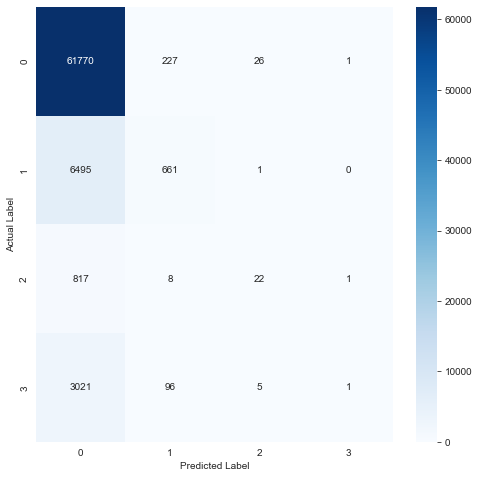

In [100]:
plt.figure(figsize = (8, 8))
CMDT = confusion_matrix(Y_test, Y_pred_DT)
sns.heatmap(CMDT,annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [101]:
print("True Predictions : ", CMDT[0][0]+CMDT[1][1]+CMDT[2][2]+CMDT[3][3])
print("False Predictions : ", CMDT[0][1]+CMDT[0][2]+CMDT[0][3]+CMDT[1][0]+CMDT[1][2]+CMDT[1][3]+CMDT[2][0]+CMDT[2][1]+CMDT[2][3]+CMDT[3][0]+CMDT[3][1]+CMDT[3][2])
CMDT

True Predictions :  62454
False Predictions :  10698


array([[61770,   227,    26,     1],
       [ 6495,   661,     1,     0],
       [  817,     8,    22,     1],
       [ 3021,    96,     5,     1]], dtype=int64)

In [102]:
print(classification_report(Y_test, Y_pred_DT))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     62024
           1       0.67      0.09      0.16      7157
           2       0.41      0.03      0.05       848
           3       0.33      0.00      0.00      3123

    accuracy                           0.85     73152
   macro avg       0.57      0.28      0.28     73152
weighted avg       0.81      0.85      0.80     73152



## Naive Bayes

In [103]:
NBclassifier = BernoulliNB()
NBclassifier.fit(X_train,Y_train)

BernoulliNB()

In [104]:
Y_pred_NB = NBclassifier.predict(X_test) 

In [105]:
print(accuracy_score(Y_test, Y_pred_NB)*100)

85.08584864391952


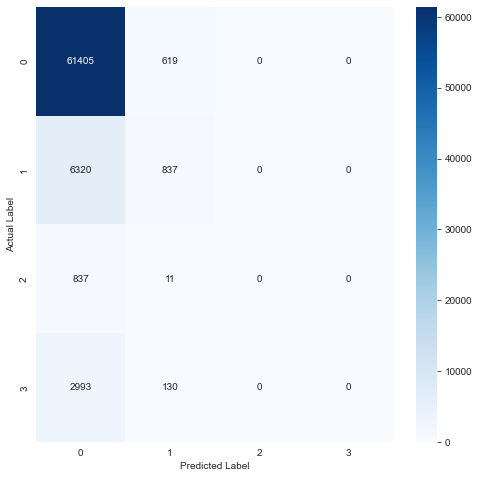

In [106]:
plt.figure(figsize = (8, 8))
CMNB = confusion_matrix(Y_test, Y_pred_NB)
sns.heatmap(CMNB,annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [107]:
print("True Predictions : ", CMNB[0][0]+CMNB[1][1]+CMNB[2][2]+CMNB[3][3])
print("False Predictions : ", CMNB[0][1]+CMNB[0][2]+CMNB[0][3]+CMNB[1][0]+CMNB[1][2]+CMNB[1][3]+CMNB[2][0]+CMNB[2][1]+CMNB[2][3]+CMNB[3][0]+CMNB[3][1]+CMNB[3][2])

True Predictions :  62242
False Predictions :  10910


In [108]:
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     62024
           1       0.52      0.12      0.19      7157
           2       0.00      0.00      0.00       848
           3       0.00      0.00      0.00      3123

    accuracy                           0.85     73152
   macro avg       0.35      0.28      0.28     73152
weighted avg       0.78      0.85      0.80     73152



c:\Users\Mayurdhvajsinh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mayurdhvajsinh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mayurdhvajsinh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [109]:
import pickle
pickle.dump(DTclassifier,open('dtmodel.pkl','wb'))
model = pickle.load(open('dtmodel.pkl','rb'))